In [14]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

# ag major contracts 
## volume

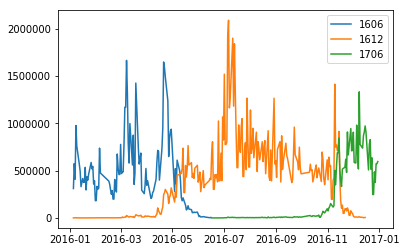

In [68]:
#ag
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.Date,data['AccVolume'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

## price

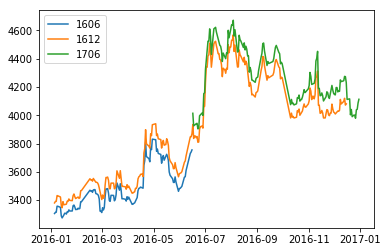

In [70]:
#ag
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.Date,data['LastPrice'],label=filename.split('_')[1])
plt.legend(loc='upper left')        
plt.show()

## bid-ask spread

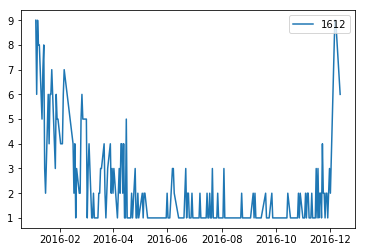

In [15]:
#ag
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_1612_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        data["Spread"] = data["AskPrice1"] - data["BidPrice1"]
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 10000])>0:
            plt.plot(data.loc[data['Spread']<10].Date,data.loc[data['Spread']<10]['Spread'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

# bu major contract
## volume

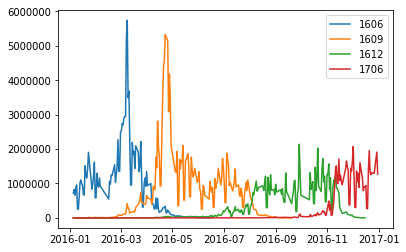

In [79]:
#bu
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.Date,data['AccVolume'],label=filename.split('_')[1])
plt.legend(loc='upper right')        
plt.show()

## price

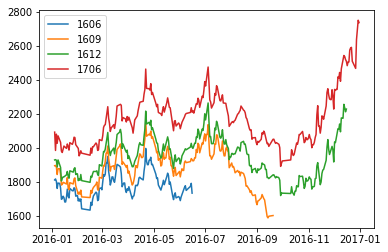

In [81]:
#bu
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.Date,data['LastPrice'],label=filename.split('_')[1])
plt.legend(loc='upper left')        
plt.show()

## bid-ask spread

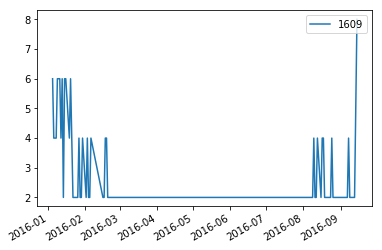

In [99]:
#bu
filepath = "D:\GitHub\QishiQR\Output"
fig = plt.figure()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_1609_*_0.0.csv"):
        data = pd.read_csv(os.path.join(path,filename), index_col=0)
        data["Date"] = pd.to_datetime(data.index)
        data["index_time"] = pd.to_datetime(data.index)
        data["index_time"] = data["index_time"].apply(lambda x:x.time()) 
        data["Spread"] = data["AskPrice1"] - data["BidPrice1"]
        #print(data.index[1].time())
        data = data[data.index_time==time(15, 0)]
        if len(data[data['AccVolume'] > 200000])>0:
            plt.plot(data.loc[data['Spread']<10].Date,data.loc[data['Spread']<10]['Spread'],label=filename.split('_')[1])
fig.autofmt_xdate()
plt.legend(loc='upper right')        
plt.show()

# Model

In [122]:
import sys
sys.path.append("D:/GitHub/QishiQR")
import Utils.MajorContract_split
import importlib
importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_split import *
import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

## ag model

In [40]:
freq = 5
for offset in np.arange(0.1, freq, 1):
    print(offset)
    ag_train, ag_test, ag_probability_table = MajorContracts(symbol='ag', split_time = '2016-7-1', topdir=r'../Data',
                                          maturity={'1606':['2015-11-1','2016-5-31'],
                                              '1612':['2016-4-15','2016-11-15'],
                                                  '1706':['2016-10-15','2017-1-31']},
                                          transitions = {'1606':'2016-5-1', '1612':'2016-11-1', '1706':'2017-1-1'},
                                          freq = freq, offset = offset).create_major_overlap()
    ag_test.to_csv(r'../Output/ag_major_' + str(freq) + '_' + str(offset) + '.csv')
    for contract in ['1606', '1612']:
        ag_probability_table[contract].to_csv(r'../Strategy/ag_'+ contract + '_major_strategy_' + str(freq) + '_' + str(offset) + '.csv', index=False)

0.1
ag1606 ../Data/ag
../Data/ag/day\ag1606_20160114.csv is empty
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-31'] 2016-01-01 00:00:00 2016-05-01 00:00:00
probability table:  20160104 20160429
ag1612 ../Data/ag
ID trade_range transition_begin transition_end
1612 ['2016-4-15', '2016-11-15'] 2016-05-01 00:00:00 2016-11-01 00:00:00
probability table:  20160503.0 20160630.0
ag1706 ../Data/ag
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
1.1
ag1606 ../Data/ag
../Data/ag/day\ag1606_20160114.csv is empty
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-31'] 2016-01-01 00:00:00 2016-05-01 00:00:00
probability table:  20160104 20160429
ag1612 ../Data/ag
ID trade_range transition_begin transition_end
1612 ['2016-4-15', '2016-11-15'] 2016-05-01 00:00:00 2016-11-01 00:00:00
probability table:  20160503.0 20160630.0
ag1706 ../Data/ag
ID trade_range transition_begin transi

In [130]:
#ag
filepath = "D:\GitHub\QishiQR\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ag_*_major_strategy_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/ag_major_strategy.csv')
print(slm.head())

ag_1606_major_strategy_5_0.1.csv
ag_1606_major_strategy_5_1.1.csv
ag_1606_major_strategy_5_2.1.csv
ag_1606_major_strategy_5_3.1.csv
ag_1606_major_strategy_5_4.1.csv
ag_1612_major_strategy_5_0.1.csv
ag_1612_major_strategy_5_1.1.csv
ag_1612_major_strategy_5_2.1.csv
ag_1612_major_strategy_5_3.1.csv
ag_1612_major_strategy_5_4.1.csv
   prior      0      1      2  total signal
0      p  36217  25625  26103  87945      0
1     p0  26401   4930   4886  36217      0
2    p00  24003   1200   1198  26401      0
3   p000  23313    368    322  24003      0
4  p0000  23065    131    117  23313      0


<Figure size 432x288 with 0 Axes>

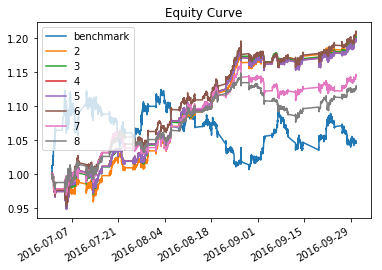

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.174478              0.002463                -0.001413   
1               0.183924              0.002440                -0.001484   
2               0.185791              0.002404                -0.001502   
3               0.185897              0.002402                -0.001502   
4               0.186753              0.002520                -0.001520   
5               0.195750              0.001809                -0.001510   
6               0.198293              0.001615                -0.001363   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000828                  0.000042             -0.027347   
1                 0.000820                  0.000053             -0.027593   
2                 0.000819                  0.000055             -0.027593   
3                 0.000819                  0.000055             -0.027593   
4        

In [131]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, symbol='ag_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

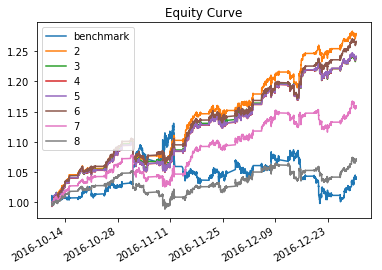

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.166923              0.003476                -0.001232   
1               0.176561              0.003040                -0.001309   
2               0.176261              0.003050                -0.001323   
3               0.176189              0.003057                -0.001323   
4               0.173363              0.003335                -0.001332   
5               0.170257              0.002097                -0.001309   
6               0.163468              0.000988                -0.001197   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.000732                  0.000057             -0.027691   
1                 0.000714                  0.000066             -0.027643   
2                 0.000712                  0.000070             -0.027643   
3                 0.000712                  0.000070             -0.027643   
4        

In [132]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, start='2016-10-1',end='2016-12-31',symbol='ag_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

## bu model

In [47]:
freq = 5
for offset in np.arange(0.1, freq, 1):
    print(offset)
    bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'../Data',
                                          maturity={'1606':['2015-11-1','2016-3-31'],
                                                    '1609':['2016-2-1','2016-7-31'],
                                                  '1612':['2016-6-1','2016-11-15'],
                                                  '1706':['2016-10-15','2017-1-31']},
                                          transitions = {'1606':'2016-3-1', '1609':'2016-07-01', '1612':'2016-11-1', '1706':'2017-1-1'},
                                          freq = freq, offset=offset).create_major_overlap()
    bu_test.to_csv(r'../Output/bu_major_' + str(freq) + '_' + str(offset) + '.csv')
    for contract in ['1606', '1609']:
        bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + str(offset) + '.csv', index=False)

0.1
bu1606 ../Data/bu
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 ../Data/bu
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-7-31'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
bu1612 ../Data/bu
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ../Data/bu
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
1.1
bu1606 ../Data/bu
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 ../Data/bu
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-7-31'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301 20160630
bu1612 

In [127]:
#bu
filepath = "D:\GitHub\QishiQR\Strategy"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy.csv')
print(slm.head())

bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
   prior      0      1      2  total signal
0      p  48665  17716  18639  85020      0
1     p0  40257   4123   4279  48659      0
2    p00  37857   1118   1276  40251      0
3   p000  37051    372    428  37851      0
4  p0000  36679    164    203  37046      0


<Figure size 432x288 with 0 Axes>

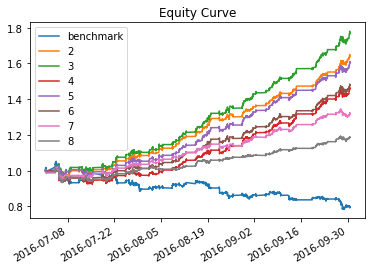

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.226242              0.007724                -0.002688   
1               0.234234              0.008917                -0.002803   
2               0.265805              0.005949                -0.003218   
3               0.251689              0.007442                -0.002906   
4               0.271105              0.006182                -0.003027   
5               0.259809              0.004392                -0.002887   
6               0.261254              0.002717                -0.002615   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001809                  0.000193             -0.032218   
1                 0.001777                  0.000300             -0.032218   
2                 0.001755                  0.000250             -0.027434   
3                 0.001756                  0.000264             -0.028542   
4        

In [128]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

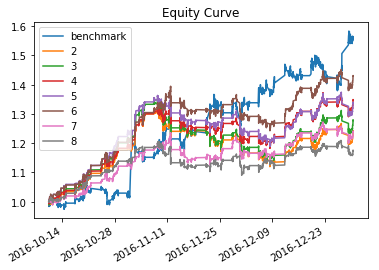

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.339514              0.003701                -0.003730   
1               0.362775              0.004207                -0.003912   
2               0.344218              0.005105                -0.004238   
3               0.349472              0.004987                -0.004011   
4               0.346662              0.006106                -0.004131   
5               0.337506              0.003694                -0.004035   
6               0.352551              0.002779                -0.003535   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002172                  0.000095             -0.042088   
1                 0.002126                  0.000141             -0.045502   
2                 0.002202                  0.000208             -0.048069   
3                 0.002127                  0.000176             -0.048069   
4        

In [129]:
#max_order=7 is actually max order 8
lm_validation = LmValidation(slm, start='2016-10-1',end='2016-12-31',symbol='bu_major', data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()